(1000, 5)
499 99 0.005397214203193745
999 99 0.005211702096395038
1499 99 0.005055475010813495
1999 99 0.005234907536259538
2499 99 0.004899653251678915
2999 99 0.005018346203521307
3499 99 0.0048048251130143865
3999 99 0.0049985852151294636
4499 99 0.004964868309854408
4999 99 0.004832565320415056
5499 99 0.00482071502402639
5999 99 0.004785805570778642
6499 99 0.00501454301482928
6999 99 0.0050185517320769845
7499 99 0.005196674372235791
7999 99 0.0048408943763609625
8499 99 0.0050700311786643
8999 99 0.00487721331296289
9499 99 0.005054774076193506
9999 99 0.004681905460152493
10499 99 0.004775111913928283
10999 99 0.005278863530909454
11499 99 0.005031471544633151
11999 99 0.0047631420499631505
12499 99 0.00467197467802994
12999 99 0.0046754371831442725
13499 99 0.004704690170912681
13999 99 0.004978745864164878
14499 99 0.0050690359086540135
14999 99 0.004773921777234539
15499 99 0.004684663751767259
15999 99 0.0048080080825340515
16499 99 0.004768091923183018
16999 99 0.004671521

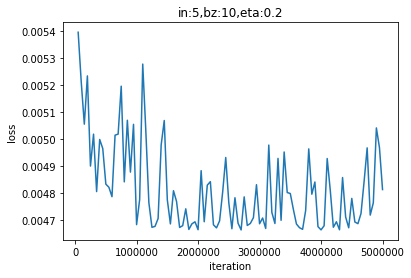

W= [[-1.45215265]
 [ 6.28860214]
 [-5.64794093]
 [-4.58597134]
 [ 6.1930357 ]]
B= [[-0.23587623]]


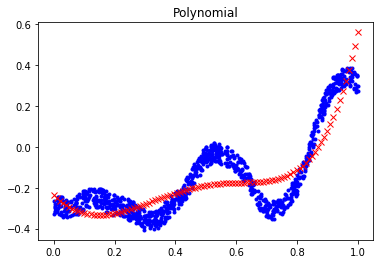

In [24]:
# Copyright (c) Microsoft. All rights reserved.
# Licensed under the MIT license. See LICENSE file in the project root for full license information.

import numpy as np
import matplotlib.pyplot as plt

from HelperClass.NeuralNet import *
from HelperClass.SimpleDataReader import *
from HelperClass.HyperParameters import *

file_name = "../../Data/ch09.train.npz"

class DataReaderEx(SimpleDataReader):
    def Add(self):
        X = self.XTrain[:,0:1]**2
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**3
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**4
        self.XTrain = np.hstack((self.XTrain, X))
        X = self.XTrain[:,0:1]**5
        self.XTrain = np.hstack((self.XTrain, X))

def ShowResult(net, dataReader, title):
    # draw train data
    X,Y = dataReader.XTrain, dataReader.YTrain
    plt.plot(X[:,0], Y[:,0], '.', c='b')
    # create and draw visualized validation data
    TX1 = np.linspace(0,1,100).reshape(100,1)
    TX2 = np.hstack((TX1, TX1[:,]**2))
    TX3 = np.hstack((TX2, TX1[:,]**3))
    TX4 = np.hstack((TX3, TX1[:,]**4))
    TX5 = np.hstack((TX4, TX1[:,]**5))
    TY = net.inference(TX5)
    plt.plot(TX1, TY, 'x', c='r')
    plt.title(title)
    plt.show()
#end def

if __name__ == '__main__':
    dataReader = DataReaderEx(file_name)
    dataReader.ReadData()
    dataReader.Add()
    print(dataReader.XTrain.shape)

    # net
    num_input = 5
    num_output = 1    
    params = HyperParameters(num_input, num_output, eta=0.2, max_epoch=50000, batch_size=10, eps=1e-3, net_type=NetType.Fitting)
    #params = HyperParameters(eta=0.2, max_epoch=1000000, batch_size=10, eps=1e-3, net_type=NetType.Fitting)
    net = NeuralNet(params)
    net.train(dataReader, checkpoint=500)
    ShowResult(net, dataReader, "Polynomial")
